In [1]:
import pandas as pd 

df = pd.read_csv('../results/v2/model_scores.csv')

# df['Weighting'] = df['Weighting'].fillna('No balancing')
df

,Unnamed: 0,Classifier,Feature_extraction,Weighting,CV,F1_tr_cv,F1_tr,F1_ts,Precision_tr_cv,Precision_tr,Precision_ts,Recall_tr_cv,Recall_tr,Recall_ts
0,0,"SVC(C=0.01, class_weight={0: 0.503995641118779...",paraphrase-multilingual-mpnet-base-v2,Weighted,2,0.068,0.075,0.071,0.035,0.039,0.037,0.829,1.000,1.000
1,1,"MLPClassifier(activation='logistic', batch_siz...",TfidfVectorizer(),"RandomUnderSampler(random_state=42, sampling_s...",2,0.032,0.046,0.050,0.016,0.024,0.026,0.800,1.000,1.000
2,2,"LogisticRegression(C=0.01,\n ...",paraphrase-multilingual-mpnet-base-v2,Weighted,2,0.075,0.084,0.071,0.039,0.044,0.037,0.743,0.971,0.889
3,3,"MLPClassifier(activation='logistic', batch_siz...",CountVectorizer(),"RandomUnderSampler(random_state=42, sampling_s...",2,0.034,0.057,0.056,0.017,0.029,0.029,0.771,1.000,0.889
4,4,"LogisticRegression(C=0.01,\n ...",distiluse-base-multilingual-cased-v1,Weighted,2,0.086,0.124,0.096,0.047,0.066,0.051,0.571,0.914,0.778
5,5,"SVC(C=0.01, class_weight={0: 0.503995641118779...",distiluse-base-multilingual-cased-v1,Weighted,2,0.051,0.113,0.089,0.027,0.060,0.047,0.571,0.914,0.778
6,6,SVC(kernel='linear'),TfidfVectorizer(),"RandomUnderSampler(random_state=42, sampling_s...",2,0.053,0.109,0.074,0.028,0.057,0.039,0.686,1.000,0.667
7,7,"LogisticRegression(random_state=42, solver='li...",TfidfVectorizer(),"RandomUnderSampler(random_state=42, sampling_s...",2,0.052,0.101,0.058,0.027,0.053,0.031,0.743,1.000,0.556
8,8,"LogisticRegression(random_state=42, solver='li...",CountVectorizer(),"RandomUnderSampler(random_state=42, sampling_s...",2,0.033,0.064,0.040,0.017,0.033,0.021,0.657,1.000,0.556
9,9,SVC(kernel='linear'),CountVectorizer(),"RandomUnderSampler(random_state=42, sampling_s...",2,0.039,0.092,0.024,0.020,0.048,0.012,0.600,1.000,0.222


In [2]:
df = df.loc[:,['Classifier', 'Feature_extraction', 'Weighting', "Recall_ts"]]


In [3]:
df['Classifier'].unique()


array(["SVC(C=0.01, class_weight={0: 0.5039956411187795, 1: 63.06818181818182},\n    kernel='linear', probability=True)",
       "MLPClassifier(activation='logistic', batch_size=16, hidden_layer_sizes=(),\n              random_state=42)",
       "LogisticRegression(C=0.01,\n                   class_weight={0: 0.5039956411187795, 1: 63.06818181818182},\n                   random_state=42, solver='liblinear')",
       "SVC(kernel='linear')",
       "LogisticRegression(random_state=42, solver='liblinear')"],
      dtype=object)

In [4]:
# replace values to shorter strings
df = df.replace(to_replace=["SVC(C=0.01, class_weight={0: 0.5039956411187795, 1: 63.06818181818182},\n    kernel='linear', probability=True)",
                            "MLPClassifier(activation='logistic', batch_size=16, hidden_layer_sizes=(),\n              random_state=42)",
                            "LogisticRegression(C=0.01,\n                   class_weight={0: 0.5039956411187795, 1: 63.06818181818182},\n                   random_state=42, solver='liblinear')",
                            "SVC(kernel='linear')",
                            "LogisticRegression(random_state=42, solver='liblinear')",
                            "distiluse-base-multilingual-cased-v1",
                            "paraphrase-multilingual-mpnet-base-v2",
                            "TfidfVectorizer()",
                            "CountVectorizer()",
                            "RandomUnderSampler(random_state=42, sampling_strategy=1)",
                            "RandomOverSampler(random_state=42, sampling_strategy='not majority')",
                            "ADASYN(random_state=42)",
                            "Weighted",
                            None],
                value=["Model head: Support Vector Machine",
                       "Model head: Multi-layer Perceptron",
                       "Model head: Logistic Regression",
                       "Model head: Support Vector Machine",
                       "Model head: Logistic Regression",
                       "Feature extraction: multilingual distillBERT",
                       "Feature extraction: multilingual MPNet",
                       "Feature extraction: TF-IDF",
                       "Feature extraction: Word Frequency",
                       "Balancing: Undersampling",
                       "Balancing: Oversampling",
                       "Balancing: Oversampling Synthetic",
                       "Balancing: Weighted",
                       "Default parametres"])

df

,Classifier,Feature_extraction,Weighting,Recall_ts
0,Model head: Support Vector Machine,Feature extraction: multilingual MPNet,Balancing: Weighted,1.000
1,Model head: Multi-layer Perceptron,Feature extraction: TF-IDF,Balancing: Undersampling,1.000
2,Model head: Logistic Regression,Feature extraction: multilingual MPNet,Balancing: Weighted,0.889
3,Model head: Multi-layer Perceptron,Feature extraction: Word Frequency,Balancing: Undersampling,0.889
4,Model head: Logistic Regression,Feature extraction: multilingual distillBERT,Balancing: Weighted,0.778
5,Model head: Support Vector Machine,Feature extraction: multilingual distillBERT,Balancing: Weighted,0.778
6,Model head: Support Vector Machine,Feature extraction: TF-IDF,Balancing: Undersampling,0.667
7,Model head: Logistic Regression,Feature extraction: TF-IDF,Balancing: Undersampling,0.556
8,Model head: Logistic Regression,Feature extraction: Word Frequency,Balancing: Undersampling,0.556
9,Model head: Support Vector Machine,Feature extraction: Word Frequency,Balancing: Undersampling,0.222


In [5]:
# pivot df to long format (only categorical variables)
df_long = df.reset_index().melt(id_vars='index', 
                                value_name='Model_configuration', 
                                value_vars=['Classifier','Feature_extraction','Weighting'])

df_long

,index,variable,Model_configuration
0,0,Classifier,Model head: Support Vector Machine
1,1,Classifier,Model head: Multi-layer Perceptron
2,2,Classifier,Model head: Logistic Regression
3,3,Classifier,Model head: Multi-layer Perceptron
4,4,Classifier,Model head: Logistic Regression
...,...,...,...
109,33,Weighting,Balancing: Oversampling Synthetic
110,34,Weighting,Balancing: Oversampling
111,35,Weighting,Balancing: Oversampling
112,36,Weighting,Balancing: Oversampling Synthetic


In [6]:
# Join dfs to include recall values
df['index'] = df.index

df_long = df_long.join(df[["Recall_ts"]], on="index", how="inner")

# reshape df to heatmap acceptable format
df_long = df_long.pivot(index="Model_configuration", columns="index", values="Recall_ts")

../results/v2/model_scores_heatmap.png


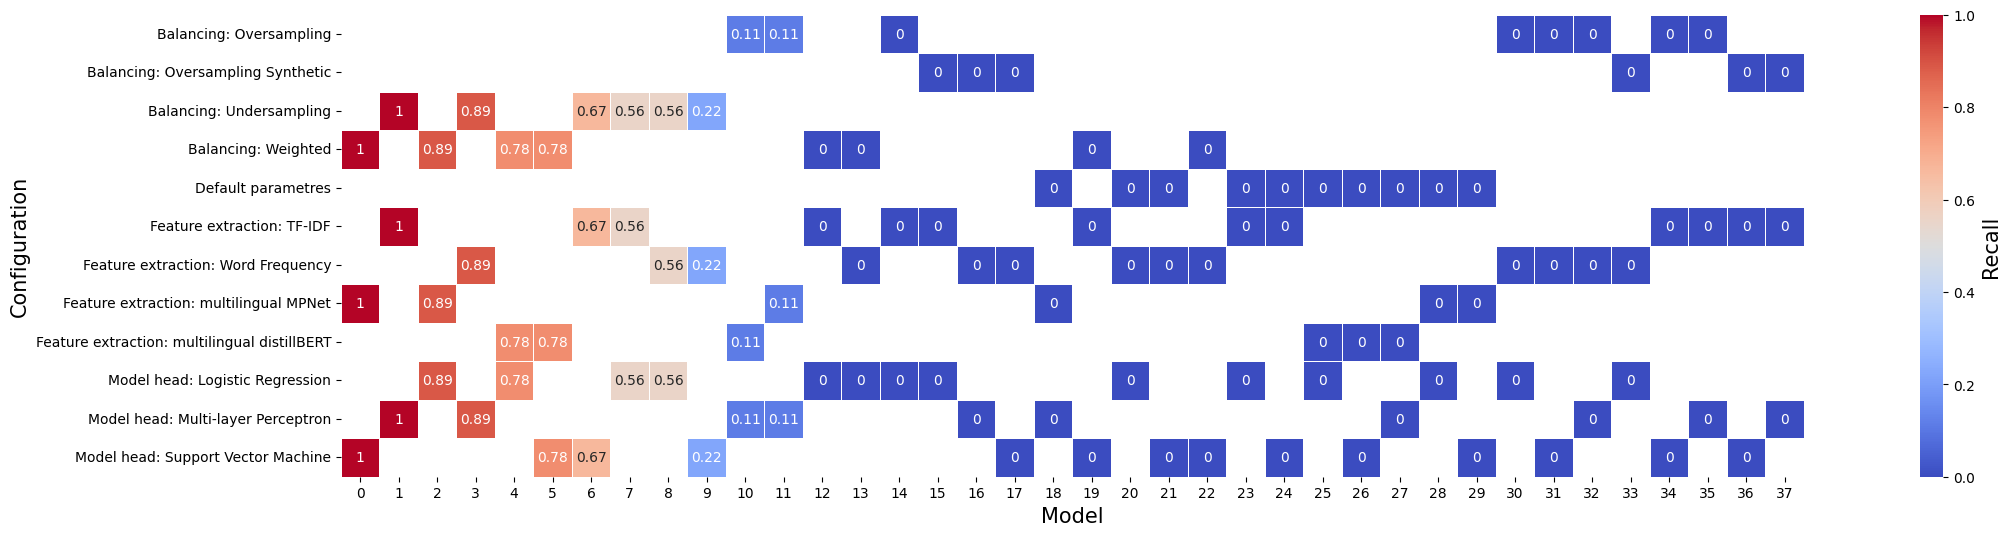

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 6))

# sns.set(font_scale=1)
ax = sns.heatmap(df_long, 
                 cmap='coolwarm',
                 square=True,
                 annot=True, 
                 linewidths=0.5, 
                 linecolor='white', 
                 cbar=True,
                 cbar_kws={'label':'Recall'})

# ax.set(xlabel="Model", ylabel="", fontsize=20)
# ax.xaxis.tick_top()
ax.set_xlabel("Model",fontsize=15)
ax.set_ylabel("Configuration",fontsize=15)
ax = ax.figure.axes[-1].yaxis.label.set_size(15)

# plt.title("")
# plt.tight_layout()
# plt.savefig('../results/v2/model_scores_heatmap.tiff', format='tiff', dpi=1000)
# plt.show()

plt.savefig('../results/v2/model_scores_heatmap.png', dpi=700, bbox_inches='tight')
print("../results/v2/model_scores_heatmap.png")